# ISLP - Chapter 3 - Exercise 08
### Author: pzuehlke

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import summarize

__8 (a)__: We follow the solution to a similar problem explained in this chapter's lab (pp. 116-122).

In [71]:
# import the data
auto = load_data("Auto")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [72]:
# Let's create the model matrix with `mpg` as response and `horsepower` as
# predictor:
X = pd.DataFrame({"intercept": np.ones(auto.shape[0]),
                  "horsepower": auto["horsepower"]})
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [73]:
# Now extract the response:
y = auto["mpg"]
y.head()

name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
Name: mpg, dtype: float64

In [74]:
# Fit the model:
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [88]:
# We store these results since we will ned them in item (b):
intercept = results.params["intercept"]
slope = results.params["horsepower"]

(i) and (ii) Looking at the associated $ t $-statistics leads us to conclude
that there is definitely a strong relationship between the predictor
`horsepower` and the response `mpg`.

(iii) The coefficient multiplying `horsepower` in the linear regression model is
negative, so the higher the horsepower, the fewer miles per gallon the car
achieves, generally. More precisely, the model implies that for every one unit
of increase in horsepower, the miles per gallon are expected to decrease by
approximately $ 0.1578 $, on average.

(iv) As computed below, the predicted `mpg` for a `horsepower` of `98` is approximately $ 24.47 $.
The $ 95 \%$ confidence intervals (mean confidence intervals) are:
$$
    [23.97, 24.96]\,,
$$
while the prediction intervals (observation confidence intervals) are
$$
    [14.81, 34.12]\,.
$$
Note that both intervals are centered at $ 24.47 $ and that the prediction
intervals are much wider, as expected.

In [86]:
new_horsepower_value = 98
# Create a DataFrame for prediction:
X_new = pd.DataFrame({"intercept": [1], "horsepower": [new_horsepower_value]})
predicted_mpg = results.get_prediction(X_new)
predicted_mpg.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


__8 (b)__:

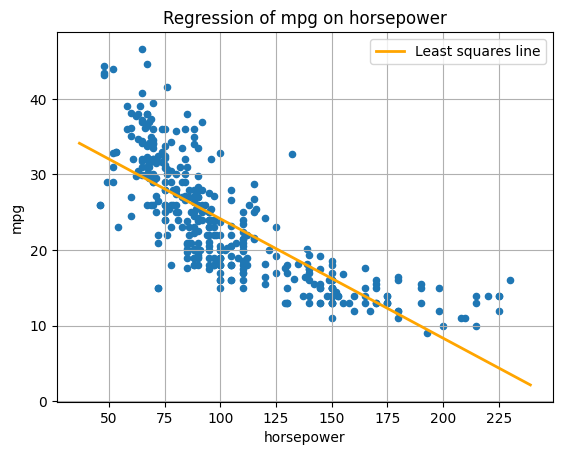

In [95]:
ax = auto.plot.scatter("horsepower", "mpg")
xlim = ax.get_xlim()
ylim = [intercept + slope * xlim[0], intercept + slope * xlim[1]]
ax.plot(xlim, ylim, color="orange", linewidth=2, label="Least squares line")

# Configure plot aestethics:
ax.set_title("Regression of mpg on horsepower")
ax.legend()
ax.grid(True)

__8 (c)__: The plot of residuals vs fitted values is U-shaped, as seen below:
residuals tend to be negative in the middle and positive on both ends. This
suggests that the model is misspecified because it is failing to capture a
nonlinear relationship between the predictor (horsepower) and the response
(mpg). More precisely, from the scatterplot of the data it seems that it is
missing a quadratic term `horsepower`$^2 $:

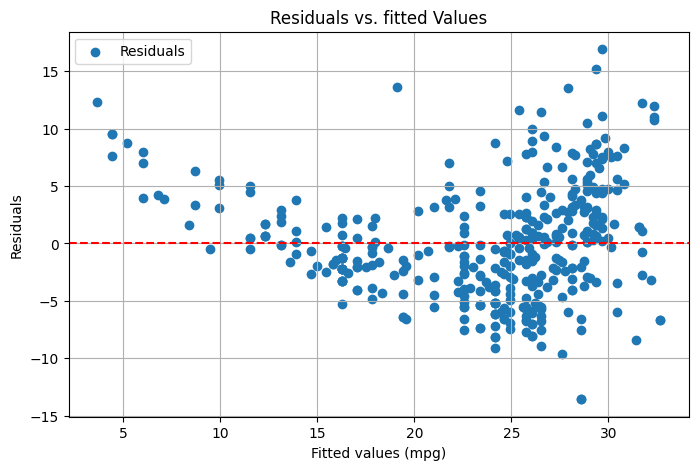

In [105]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(results.fittedvalues, results.resid, label="Residuals")
ax.axhline(y=0, color="red", linestyle="dashed", linewidth=1.5)
ax.set_xlabel("Fitted values (mpg)")
ax.set_ylabel("Residuals")

ax.set_title("Residuals vs. fitted Values")
ax.legend()
ax.grid(True)
plt.show()

Finally, the $ R^2 $ is relatively low. This might also indicate a problem with our assumption that
the relationship between `mpg` and `horsepower` is approximately linear:

In [107]:
r_squared = results.rsquared
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.6059
